# Heart Disease


### Daftar Isi

- [1) Mengumpulkan Data](#h1)
- [2) Menelaah Data](#h2)
- [3) Memvalidasi Data](#h3)
- [4) Menetukan Object Data](#h4)
- [5) Membersihkan Data](#h5)
  - [5.1) NULL Value](#h5_1)
  - [5.2) Duplicate Value](#h5_2)
  - [5.3) Heatmap Korelasi antar Fitur](#h5_3)
- [6) Mengkonstruksi Data](#h6)
  - [6.1) Oversampling dengan SMOTE](#h6_1)
  - [6.2) Normalisasi Fitur dengan MinMax Scaler](#h6_2)
- [7) Membangun Model](#h7)
  - [7.1) KNN](#h7_1)
  - [7.2) Random Forest](#h7_2)
  - [7.3) Decision Tree](#h7_3)
- [8) Mengevaluasi Hasil Pemodelan](#h8)
- [9) Deployment](#h9)
- [10) Kesimpulan](#h10)


## 1) Mengumpulkan Data <a class="anchor" id="h1"></a>


In [56]:
dir = 'hungarian.data'
with open(dir, encoding='Latin-1') as f:
    lines = [line.rstrip() for line in f]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [57]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2) Menelaah Data <a class="anchor" id="h2"></a>


In [58]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:i+10]).split() for i in range(0, len(lines), 10)
))

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


## 3) Memvalidasi Data <a class="anchor" id="h3"></a>


In [59]:
df = df.iloc[:, :-1]
df = df.drop(df.columns[0], axis=1)

In [60]:
df = df.astype(float)
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

In [61]:
df.replace(-9.0, np.nan, inplace=True)

df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [62]:
# (1) Kolom 3 (age)
# (2) Kolom 4 (sex)
# (3) Kolom 9 (cp)
# (4) Kolom 10 (trestbps)
# (5) Kolom 12 (chol)
# (6) Kolom 16 (fbs)
# (7) Kolom 19 (restecg)
# (8) Kolom 32 (thalach)
# (9) Kolom 38 (exang)
# (10) Kolom 40 (oldpeak)
# (11) Kolom 41 (slope)
# (12) Kolom 44 (ca)
# (13) Kolom 51 (thal)
# (14) Kolom 58 (num/target)

## 4) Menentukan Objek Data <a class="anchor" id="h4"></a>


In [63]:
# Daftar kolom yang ingin Anda gunakan sebagai fitur
# df_subset = df[['A', 'B']].copy()
df_select = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]  
# df_select = df[[1,2,7,8,10,14,17,30,36,38,39,42,49,56]].copy()

# Menampilkan DataFrame dengan kolom yang dipilih
print(df_select)

       2    3    8      9      11   15   18     31   37   39   40  43   50  \
0    40.0  1.0  2.0  140.0  289.0  0.0  0.0  172.0  0.0  0.0  NaN NaN  NaN   
1    49.0  0.0  3.0  160.0  180.0  0.0  0.0  156.0  0.0  1.0  2.0 NaN  NaN   
2    37.0  1.0  2.0  130.0  283.0  0.0  1.0   98.0  0.0  0.0  NaN NaN  NaN   
3    48.0  0.0  4.0  138.0  214.0  0.0  0.0  108.0  1.0  1.5  2.0 NaN  NaN   
4    54.0  1.0  3.0  150.0    NaN  0.0  0.0  122.0  0.0  0.0  NaN NaN  NaN   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ..  ...   
289  48.0  0.0  2.0    NaN  308.0  0.0  1.0    NaN  NaN  2.0  1.0 NaN  NaN   
290  36.0  1.0  2.0  120.0  166.0  0.0  0.0  180.0  0.0  0.0  NaN NaN  NaN   
291  48.0  1.0  3.0  110.0  211.0  0.0  0.0  138.0  0.0  0.0  NaN NaN  6.0   
292  47.0  0.0  2.0  140.0  257.0  0.0  0.0  135.0  0.0  1.0  1.0 NaN  NaN   
293  53.0  1.0  4.0  130.0  182.0  0.0  0.0  148.0  0.0  0.0  NaN NaN  NaN   

      57  
0    0.0  
1    1.0  
2    0.0  
3    3.0  
4    0.0

In [64]:
features_dict = {
    2:"age",
    3:"sex",
    8:"cp",
    9:"trestbps",
    11:"chol",
    15:"fbs",
    18:"restecg",
    31:"thalach",
    37:"exang",
    39:"oldpeak",
    40:"slope",
    43:"ca",
    50:"thal",
    57:"target"
}

df_select.rename(columns=features_dict, inplace=True)
df_select.head()

C:\Users\d\AppData\Local\Temp\ipykernel_5192\3719889940.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.rename(columns=features_dict, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


## 5) Membersihkan Data <a class="anchor" id="h5"></a>


#### 5.1) NULL Value <a id="h5_1"></a>


In [65]:
df_select.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [66]:
drop_columns = ['slope', 'ca', 'thal']
df_select.drop(drop_columns, axis=1, inplace=True)
df_select.isnull().sum()

C:\Users\d\AppData\Local\Temp\ipykernel_5192\2054314881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.drop(drop_columns, axis=1, inplace=True)


age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [67]:
dfClean = df_select.copy()

In [68]:
handle_columns = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']
handle_null = {}

for col in handle_columns:
    if dfClean[col].isnull().sum() != 0:
        # continue
        handle_null[col] = df_select[col].dropna()
        mean_value = handle_null[col].astype(float).mean()
        mean_value_round = round(mean_value)
        print(f"Mean {col} : {mean_value_round}")
        fill_value = {col: mean_value_round}
        dfClean.fillna(value=fill_value, inplace=True)

dfClean.isnull().sum()


Mean trestbps : 133
Mean chol : 251
Mean fbs : 0
Mean restecg : 0
Mean thalach : 139
Mean exang : 0


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [69]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


#### 5.2) Duplicate Value <a id="h5_2"></a>


In [70]:
print(dfClean.duplicated().sum())
dfClean[dfClean.duplicated(keep=False)]

1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [71]:
if dfClean.duplicated().sum() != 0:
    dfClean = dfClean.drop_duplicates()
    
print(dfClean.duplicated().sum())
dfClean[dfClean.duplicated(keep=False)]

0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


#### 5.3) Heatmap Korelasi antar Fitur <a id="h5_3"></a>


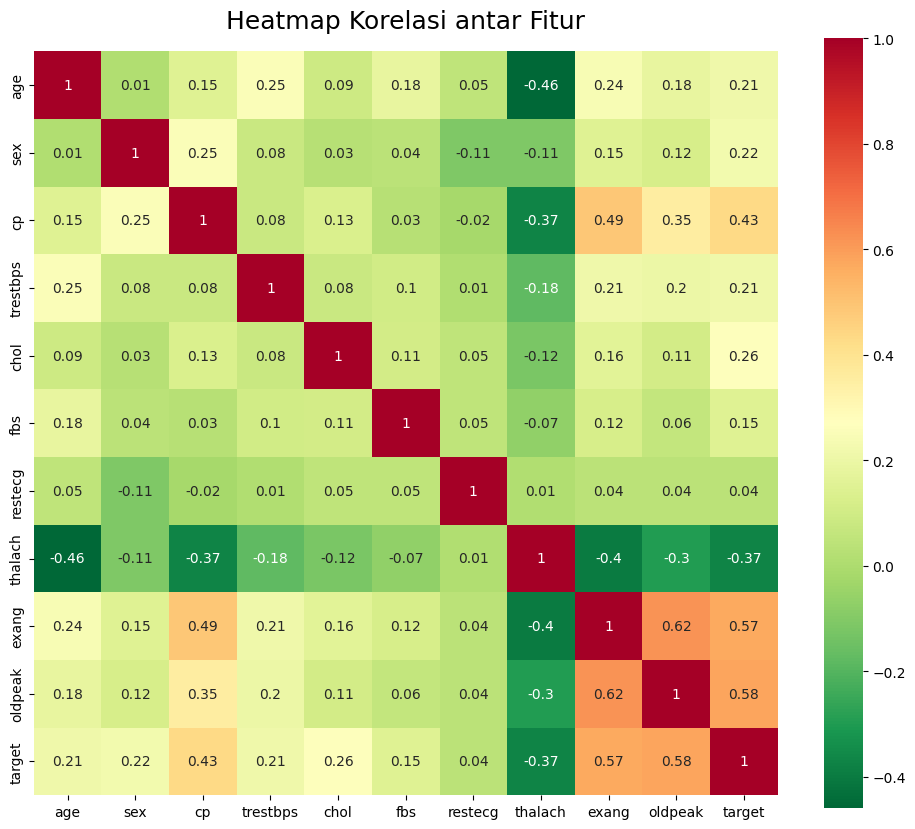

In [72]:
correlation = dfClean.corr()
plt.figure(figsize=(12, 10))
plt.title("Heatmap Korelasi antar Fitur", y=1.02, fontdict={'size': 18})
sns.heatmap(
  correlation.round(2),
  annot = True,
  vmax = 1,
  square = True,
  cmap = 'RdYlGn_r'
)

plt.show()

## 6) Menkonstruksi Data <a class="anchor" id="h6"></a>


#### 6.1) Oversampling dengan SMOTE <a id="h6_1"></a>


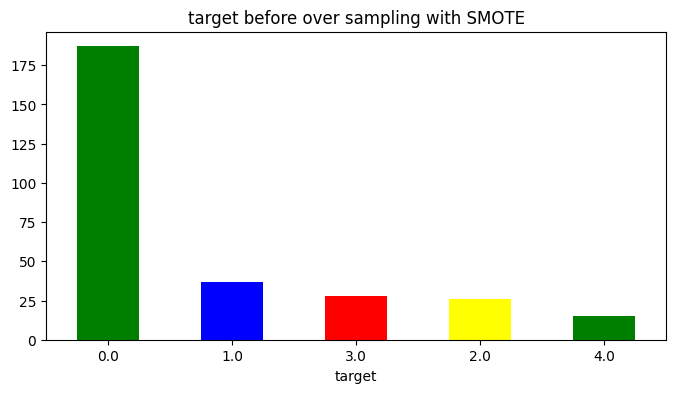

In [73]:
X = dfClean.drop('target', axis=1)
y = dfClean['target']

y.value_counts().plot(kind='bar', figsize=(8,4), color=['green', 'blue', 'red', 'yellow'])
plt.title('target before over sampling with SMOTE')
plt.xticks(rotation=0);

In [74]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [75]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [76]:
target_before_smote = pd.DataFrame(data=y)
print(f"target_before_smote")
print(target_before_smote.value_counts())
print(f'Jumlah Data Sebelum SMOTE : {len(target_before_smote)}')

target_after_smote = pd.DataFrame(data=y_res)
print(f"\ntarget_after_smote")
print(target_after_smote.value_counts())
print(f'Jumlah Data Sesudah SMOTE : {len(target_after_smote)}')

target_before_smote
target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
Name: count, dtype: int64
Jumlah Data Sebelum SMOTE : 293

target_after_smote
target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
Name: count, dtype: int64
Jumlah Data Sesudah SMOTE : 935


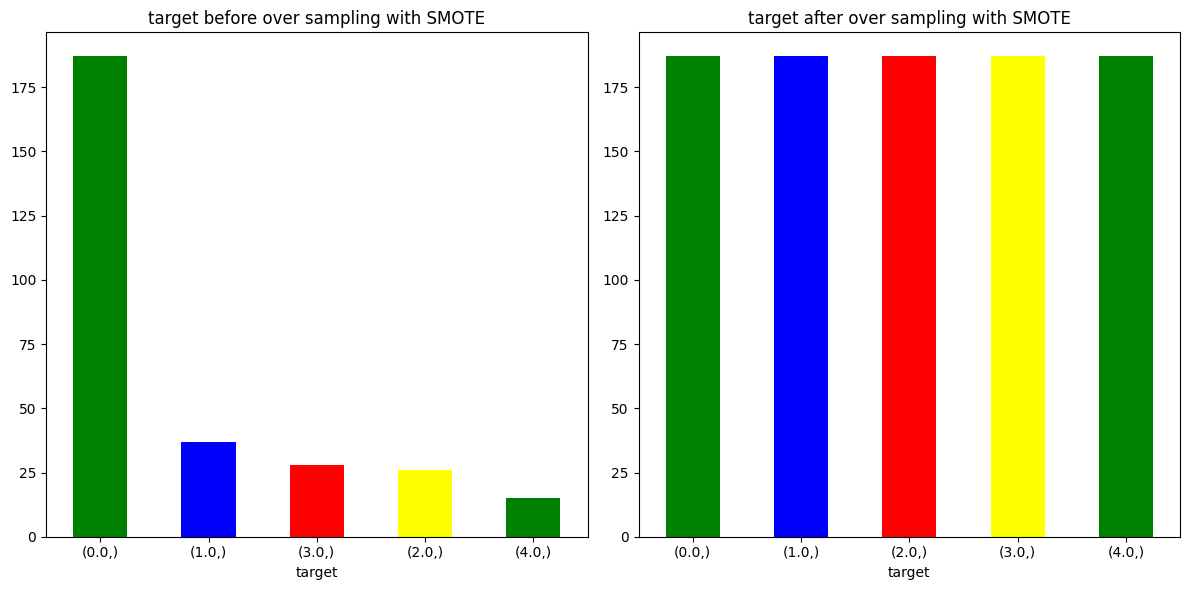

In [77]:
plt.subplot(1,2,1)
target_before_smote.value_counts().plot(kind='bar', figsize=(12,6), color=['green', 'blue', 'red', 'yellow'])
plt.title('target before over sampling with SMOTE')
plt.xticks(rotation=0);

plt.subplot(1,2,2)
target_after_smote.value_counts().plot(kind='bar', figsize=(12,6), color=['green', 'blue', 'red', 'yellow'])
plt.title('target after over sampling with SMOTE')
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

#### 6.2) Normalisasi Fitur dengan MinMax Scaler <a id="h6_2"></a>


In [78]:
scaler = MinMaxScaler()
X_smote_norm = scaler.fit_transform(X_res)
print(pd.DataFrame(data=X_smote_norm))

            0         1         2         3         4    5         6  \
0    0.315789  1.000000  0.333333  0.444444  0.393822  0.0  0.000000   
1    0.552632  0.000000  0.666667  0.629630  0.183398  0.0  0.000000   
2    0.236842  1.000000  0.333333  0.351852  0.382239  0.0  0.500000   
3    0.526316  0.000000  1.000000  0.425926  0.249035  0.0  0.000000   
4    0.684211  1.000000  0.666667  0.537037  0.320463  0.0  0.000000   
..        ...       ...       ...       ...       ...  ...       ...   
930  0.440021  0.843563  0.947854  0.429960  0.393704  0.0  0.078219   
931  0.611772  0.250243  0.750081  0.375022  0.400576  0.0  0.374879   
932  0.525224  0.549227  0.849742  0.402706  0.397113  0.0  0.225387   
933  0.537553  1.000000  1.000000  0.576777  0.383909  0.0  0.357298   
934  0.875320  0.660197  0.886732  0.351852  0.379259  0.0  0.500000   

            7    8         9  
0    0.833333  0.0  0.000000  
1    0.685185  0.0  0.200000  
2    0.148148  0.0  0.000000  
3    0.2407

In [79]:
dfClean_norm = pd.DataFrame(X_smote_norm)
print(len(dfClean_norm))
dfClean_norm.head()

935


,0,1,2,3,4,5,6,7,8,9
0,0.315789,1.0,0.333333,0.444444,0.393822,0.0,0.0,0.833333,0.0,0.0
1,0.552632,0.0,0.666667,0.629630,0.183398,0.0,0.0,0.685185,0.0,0.2
2,0.236842,1.0,0.333333,0.351852,0.382239,0.0,0.5,0.148148,0.0,0.0
3,0.526316,0.0,1.000000,0.425926,0.249035,0.0,0.0,0.240741,1.0,0.3
4,0.684211,1.0,0.666667,0.537037,0.320463,0.0,0.0,0.370370,0.0,0.0


## 7) Membangun Model <a class="anchor" id="h7"></a>


In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [81]:
def trainModel(X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=3)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    dt = DecisionTreeClassifier(random_state=42)
    knn.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    return knn, rf, dt

In [82]:
def predictModel(model, X_test):
    pred = model.predict(X_test)
    return pred

In [83]:
def evaluateModel(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    rcl = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    ps = precision_score(y_test, y_pred, average='weighted')

    metric_dict = {
        'accuracy': round(acc, 3),
        'recall': round(rcl, 3),
        'F1 score': round(f1, 3),
        'Precision score': round(ps, 3)
    }

    return metric_dict

In [84]:
def reportModel(modelPred, y_test):
    print("Classification Report:")
    print(f"{classification_report(y_test, modelPred)}")

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# SPLIT DATA TRAINING DAN TESTING DENGAN RASIO 80:20 (ORI)
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# SPLIT DATA TRAINING DAN TESTING DENGAN RASIO 80:20 (OVERSAMPLING)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [88]:
# SPLIT DATA TRAINING DAN TESTING DENGAN RASIO 80:20 (OVERSAMPLING + NORMALISASI)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_smote_norm, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [89]:
knn_ori, rf_ori, dt_ori = trainModel(X_train_ori, y_train_ori)

In [90]:
knn, rf, dt = trainModel(X_train, y_train)

In [91]:
knn_N, rf_N, dt_N = trainModel(X_train_norm, y_train_norm)

#### 7.1) KNN <a id="h7_1"></a>


In [92]:
# KNN MODELLING (ori)
print("KNN Model:")
knn_pred_ori = predictModel(knn_ori, X_test_ori)
metrics_knn_ori = evaluateModel(y_test_ori, knn_pred_ori)
accuracy_knn_ori = metrics_knn_ori['accuracy']
print("Accuracy Score KNN:", accuracy_knn_ori)

reportModel(knn_pred_ori, y_test_ori)
print(f"Evaluate KNN : {metrics_knn_ori}")

KNN Model:
Accuracy Score KNN: 0.593
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78        40
         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         1

    accuracy                           0.59        59
   macro avg       0.14      0.17      0.16        59
weighted avg       0.47      0.59      0.53        59

Evaluate KNN : {'accuracy': 0.593, 'recall': 0.593, 'F1 score': 0.527, 'Precision score': 0.475}


In [93]:
# KNN MODELLING (OVERSAMPLING)
print("KNN Model:")
knn_pred = predictModel(knn, X_test)
metrics_knn = evaluateModel(y_test, knn_pred)
accuracy_knn = metrics_knn['accuracy']
print("Accuracy Score KNN:", accuracy_knn)

reportModel(knn_pred, y_test)
print(f"Evaluate KNN : {metrics_knn}")

KNN Model:
Accuracy Score KNN: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187

Evaluate KNN : {'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


In [94]:
# KNN MODELLING (OVERSAMPLING + NORMALISASI)
print("KNN Model Normalisasi:")
knn_pred_N = predictModel(knn_N, X_test_norm)
metrics_knn_N = evaluateModel(y_test_norm, knn_pred_N)
accuracy_knn_N = metrics_knn_N['accuracy']
print("Accuracy Score KNN:", accuracy_knn_N)

reportModel(knn_pred_N, y_test_norm)
print(f"Evaluate KNN : {metrics_knn_N}")

KNN Model Normalisasi:
Accuracy Score KNN: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187

Evaluate KNN : {'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


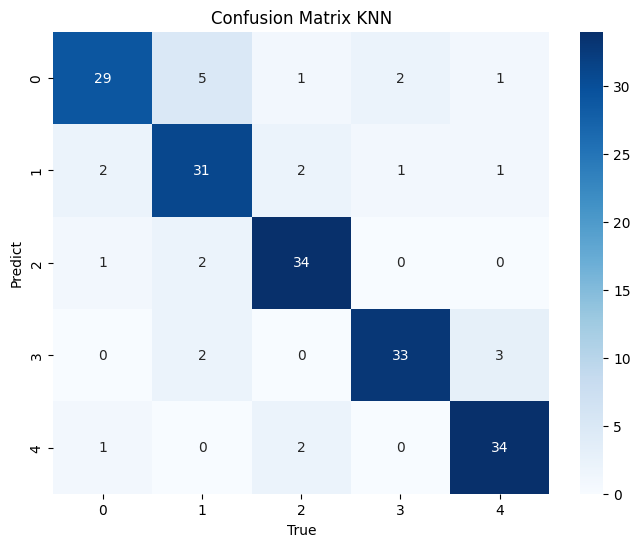

In [95]:
# nilai confusion matrix untuk model KNN
cm = confusion_matrix(y_test_norm, knn_pred_N)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### 7.2) Random Forest <a id="h7_2"></a>


In [96]:
# Random Forest MODELLING (ORI)
print("Random Forest Model:")
rf_pred_ori = predictModel(rf_ori, X_test_ori)
metrics_rf_ori = evaluateModel(y_test_ori, rf_pred_ori)
accuracy_rf_ori = metrics_rf_ori['accuracy']
print("Accuracy Score Random Forest:", accuracy_rf_ori)

reportModel(rf_pred_ori, y_test_ori)
print(f"Evaluate Random Forest : {metrics_rf_ori}")

Random Forest Model:
Accuracy Score Random Forest: 0.678
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88        40
         1.0       0.40      0.25      0.31         8
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         1

    accuracy                           0.68        59
   macro avg       0.25      0.24      0.24        59
weighted avg       0.61      0.68      0.64        59

Evaluate Random Forest : {'accuracy': 0.678, 'recall': 0.678, 'F1 score': 0.641, 'Precision score': 0.614}


In [97]:
# Random Forest MODELLING (OVERSAMPLING)
print("Random Forest Model:")
rf_pred = predictModel(rf, X_test)
metrics_rf = evaluateModel(y_test, rf_pred)
accuracy_rf = metrics_rf['accuracy']
print("Accuracy Score Random Forest:", accuracy_rf)

reportModel(rf_pred, y_test)
print(f"Evaluate Random Forest : {metrics_rf}")

Random Forest Model:
Accuracy Score Random Forest: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187

Evaluate Random Forest : {'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


In [98]:
# Random Forest MODELLING (OVERSAMPLING + NORMALISASI)
print("Random Forest Model OVERSAMPLING + NORMALISASI:")
rf_pred_N = predictModel(rf_N, X_test_norm)
metrics_rf_N = evaluateModel(y_test_norm, rf_pred_N)
accuracy_rf_N = metrics_rf_N['accuracy']
print("Accuracy Score Random Forest:", accuracy_rf_N)

reportModel(rf_pred_N, y_test_norm)
print(f"Evaluate Random Forest : {metrics_rf_N}")

Random Forest Model OVERSAMPLING + NORMALISASI:
Accuracy Score Random Forest: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187

Evaluate Random Forest : {'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


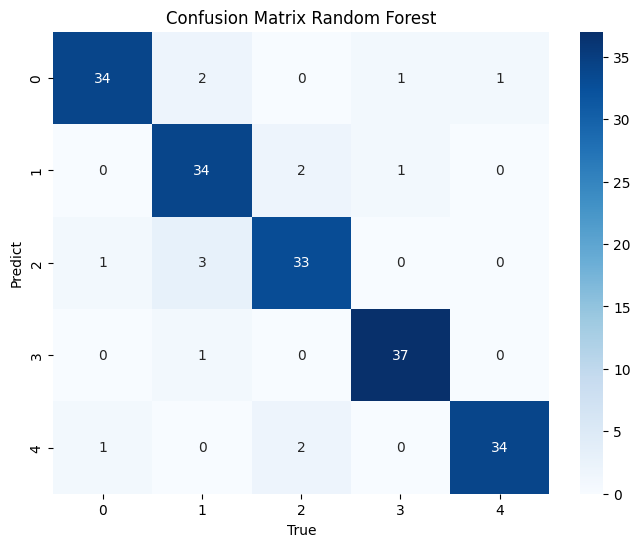

In [99]:
# nilai confusion matrix untuk model Random Forest
cm = confusion_matrix(y_test, rf_pred_N)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Random Forest')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### 7.3) Decision Tree <a id="h7_3"></a>


In [100]:
# Decision Tree MODELLING
print("Decision Tree Model:")
dt_pred_ori = predictModel(dt_ori, X_test_ori)
metrics_dt_ori = evaluateModel(y_test_ori, dt_pred_ori)
accuracy_dt_ori = metrics_dt_ori['accuracy']
print("Accuracy Score Decision Tree:", accuracy_dt_ori)

reportModel(dt_pred_ori, y_test_ori)
print(f"Evaluate Decision Tree : {metrics_dt_ori}")

Decision Tree Model:
Accuracy Score Decision Tree: 0.593
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80        40
         1.0       0.17      0.12      0.14         8
         2.0       0.00      0.00      0.00         4
         3.0       0.25      0.17      0.20         6
         4.0       0.00      0.00      0.00         1

    accuracy                           0.59        59
   macro avg       0.24      0.22      0.23        59
weighted avg       0.58      0.59      0.59        59

Evaluate Decision Tree : {'accuracy': 0.593, 'recall': 0.593, 'F1 score': 0.585, 'Precision score': 0.581}


In [101]:
# Decision Tree MODELLING
print("Decision Tree Model:")
dt_pred = predictModel(dt, X_test)
metrics_dt = evaluateModel(y_test, dt_pred)
accuracy_dt = metrics_dt['accuracy']
print("Accuracy Score Decision Tree:", accuracy_dt)

reportModel(dt_pred, y_test)
print(f"Evaluate Decision Tree : {metrics_dt}")

Decision Tree Model:
Accuracy Score Decision Tree: 0.77
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        38
         1.0       0.72      0.78      0.75        37
         2.0       0.81      0.70      0.75        37
         3.0       0.79      0.68      0.73        38
         4.0       0.80      0.86      0.83        37

    accuracy                           0.77       187
   macro avg       0.77      0.77      0.77       187
weighted avg       0.77      0.77      0.77       187

Evaluate Decision Tree : {'accuracy': 0.77, 'recall': 0.77, 'F1 score': 0.769, 'Precision score': 0.773}


In [102]:
# Decision Tree MODELLING (OVERSAMPLING + NORMALISASI)
print("Decision Tree Model OVERSAMPLING + NORMALISASI:")
dt_pred_N = predictModel(dt_N, X_test_norm)
metrics_dt_N = evaluateModel(y_test_norm, dt_pred_N)
accuracy_dt_N = metrics_dt_N['accuracy']
print("Accuracy Score Decision Tree:", accuracy_dt_N)

reportModel(dt_pred_N, y_test_norm)
print(f"Evaluate Decision Tree : {metrics_dt_N}")

Decision Tree Model OVERSAMPLING + NORMALISASI:
Accuracy Score Decision Tree: 0.77
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        38
         1.0       0.72      0.78      0.75        37
         2.0       0.81      0.70      0.75        37
         3.0       0.79      0.68      0.73        38
         4.0       0.80      0.86      0.83        37

    accuracy                           0.77       187
   macro avg       0.77      0.77      0.77       187
weighted avg       0.77      0.77      0.77       187

Evaluate Decision Tree : {'accuracy': 0.77, 'recall': 0.77, 'F1 score': 0.769, 'Precision score': 0.773}


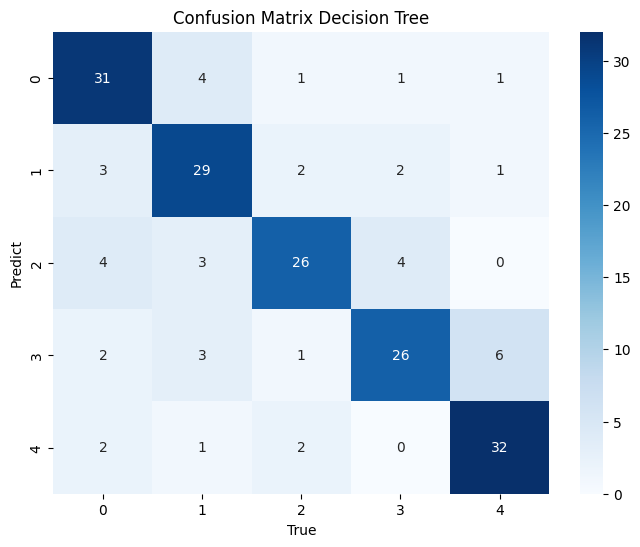

In [103]:
# nilai confusion matrix untuk model Decision Tree
cm = confusion_matrix(y_test, dt_pred_N)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## 8) Mengevaluasi Hasil Pemodelan <a class="anchor" id="h8"></a>


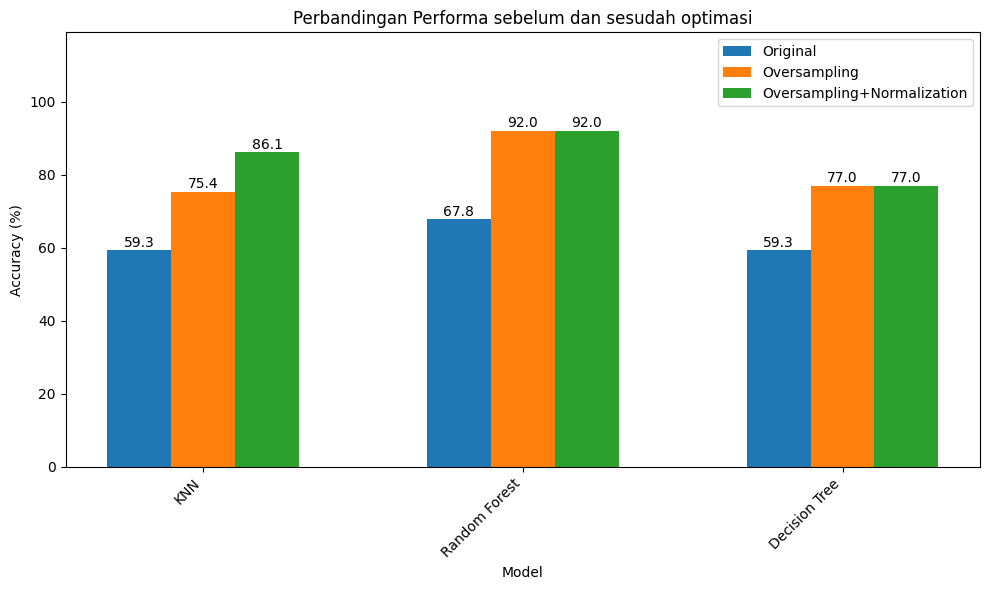

In [105]:
# membuat graph hasil pemodelan
model_name = ['KNN', 'Random Forest', 'Decision Tree']
data_ori = [accuracy_knn_ori*100, accuracy_rf_ori*100, accuracy_dt_ori*100 ]
data_oversampling = [accuracy_knn*100, accuracy_rf*100, accuracy_dt*100 ]
data_oversampling_norm = [accuracy_knn_N*100, accuracy_rf_N*100, accuracy_dt_N*100]

X_axis = np.arange(len(model_name))
bar_width = 0.2

# Membuat grafik
plt.figure(figsize=(10, 6))
bars_1 = plt.bar(X_axis - bar_width, data_ori, bar_width, label='Original')
bars_2 = plt.bar(X_axis, data_oversampling, bar_width, label='Oversampling')
bars_3 = plt.bar(X_axis + bar_width, data_oversampling_norm, bar_width, label='Oversampling+Normalization')

# Menambahkan teks di atas setiap bar
for i in range(len(X_axis)):
    plt.text(i - bar_width, data_ori[i] + 1, str(round(data_ori[i], 1)), ha='center')
    plt.text(i, data_oversampling[i] + 1, str(round(data_oversampling[i], 1)), ha='center')
    plt.text(i + bar_width, data_oversampling_norm[i] + 1, str(round(data_oversampling_norm[i], 1)), ha='center')

# Menambahkan label dan judul
plt.xticks(X_axis, model_name, rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Perbandingan Performa sebelum dan sesudah optimasi')
plt.ylim(None, 119)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

## 9) Deployment <a class="anchor" id="h9"></a>


In [106]:
import pickle

In [107]:
data_final = {'data': dfClean}
with open('source/data_final.pkl', 'wb') as info:
    pickle.dump(data_final, info)

In [108]:
accuracy = {'accuracy_knn': accuracy_knn_N, 'accuracy_rf': accuracy_rf_N, 'accuracy_dt': accuracy_dt_N}
with open('source/accuracy_model.pkl', 'wb') as info:
    pickle.dump(accuracy, info)

In [109]:
model_prediction = {'knn': knn_N, 'rf': rf_N, 'dt': dt_N}
with open('source/model.pkl', 'wb') as model:
    pickle.dump(model_prediction, model)

In [110]:
with open('source/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

## 10) Kesimpulan <a class="anchor" id="h10"></a>


> Dataset : Heart Disease (https://archive.ics.uci.edu/dataset/45/heart+disease)

> Model yang Dibandingkan : KNN, Random Forest, Decision Tree

> Fitur Data yang diperbandingan :
>
> - Data original
> - Oversampling dengan SMOTE
> - Oversampling dengan SMOTE + Normalisasi Fitur dengan MinMax Scaler

> Hasil :
>
> - Model KNN
>   - Accuracy Data Original : 59.3 %
>   - Accuracy Data Oversampling : 75.4 %
>   - Accuracy Data Oversampling + Normalization : 86.1 %
> - Model Random Forest
>   - Accuracy Data Original : 67.8 %
>   - Accuracy Data Oversampling : 92.0 %
>   - Accuracy Data Oversampling + Normalization : 92.0 %
> - Model Decision Tree
>   - Accuracy Data Original : 59.3 %
>   - Accuracy Data Oversampling : 77.0 %
>   - Accuracy Data Oversampling + Normalization : 77.0 %

> Kesimpulan :
>
> Penerapan oversampling dan normalisasi fitur dapat meningkatkan performa pada model secara signifikan. Random Forest secara konsisten menunjukkan performa terbaik di antara ketiga model pada semua dataset.
